In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
df = pd.read_csv("salary_data.csv")

In [3]:
def split_data(X, y, train_percent):
    N = len(X)
    idx = np.arange(N)
    np.random.shuffle(idx)

    train_size = int(N * train_percent / 100)
    train_idx = idx[:train_size]
    test_idx = idx[train_size:]

    return X[train_idx], y[train_idx], X[test_idx], y[test_idx]


def ols_fit(X, y):
    x_mean, y_mean = np.mean(X), np.mean(y)
    w1 = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2) 
    w0 = y_mean - w1 * x_mean
    return w0, w1

def predict(X, w0, w1):
    return w0 + w1 * X


In [4]:
import os
os.makedirs("plots", exist_ok=True)
os.makedirs("results", exist_ok=True)

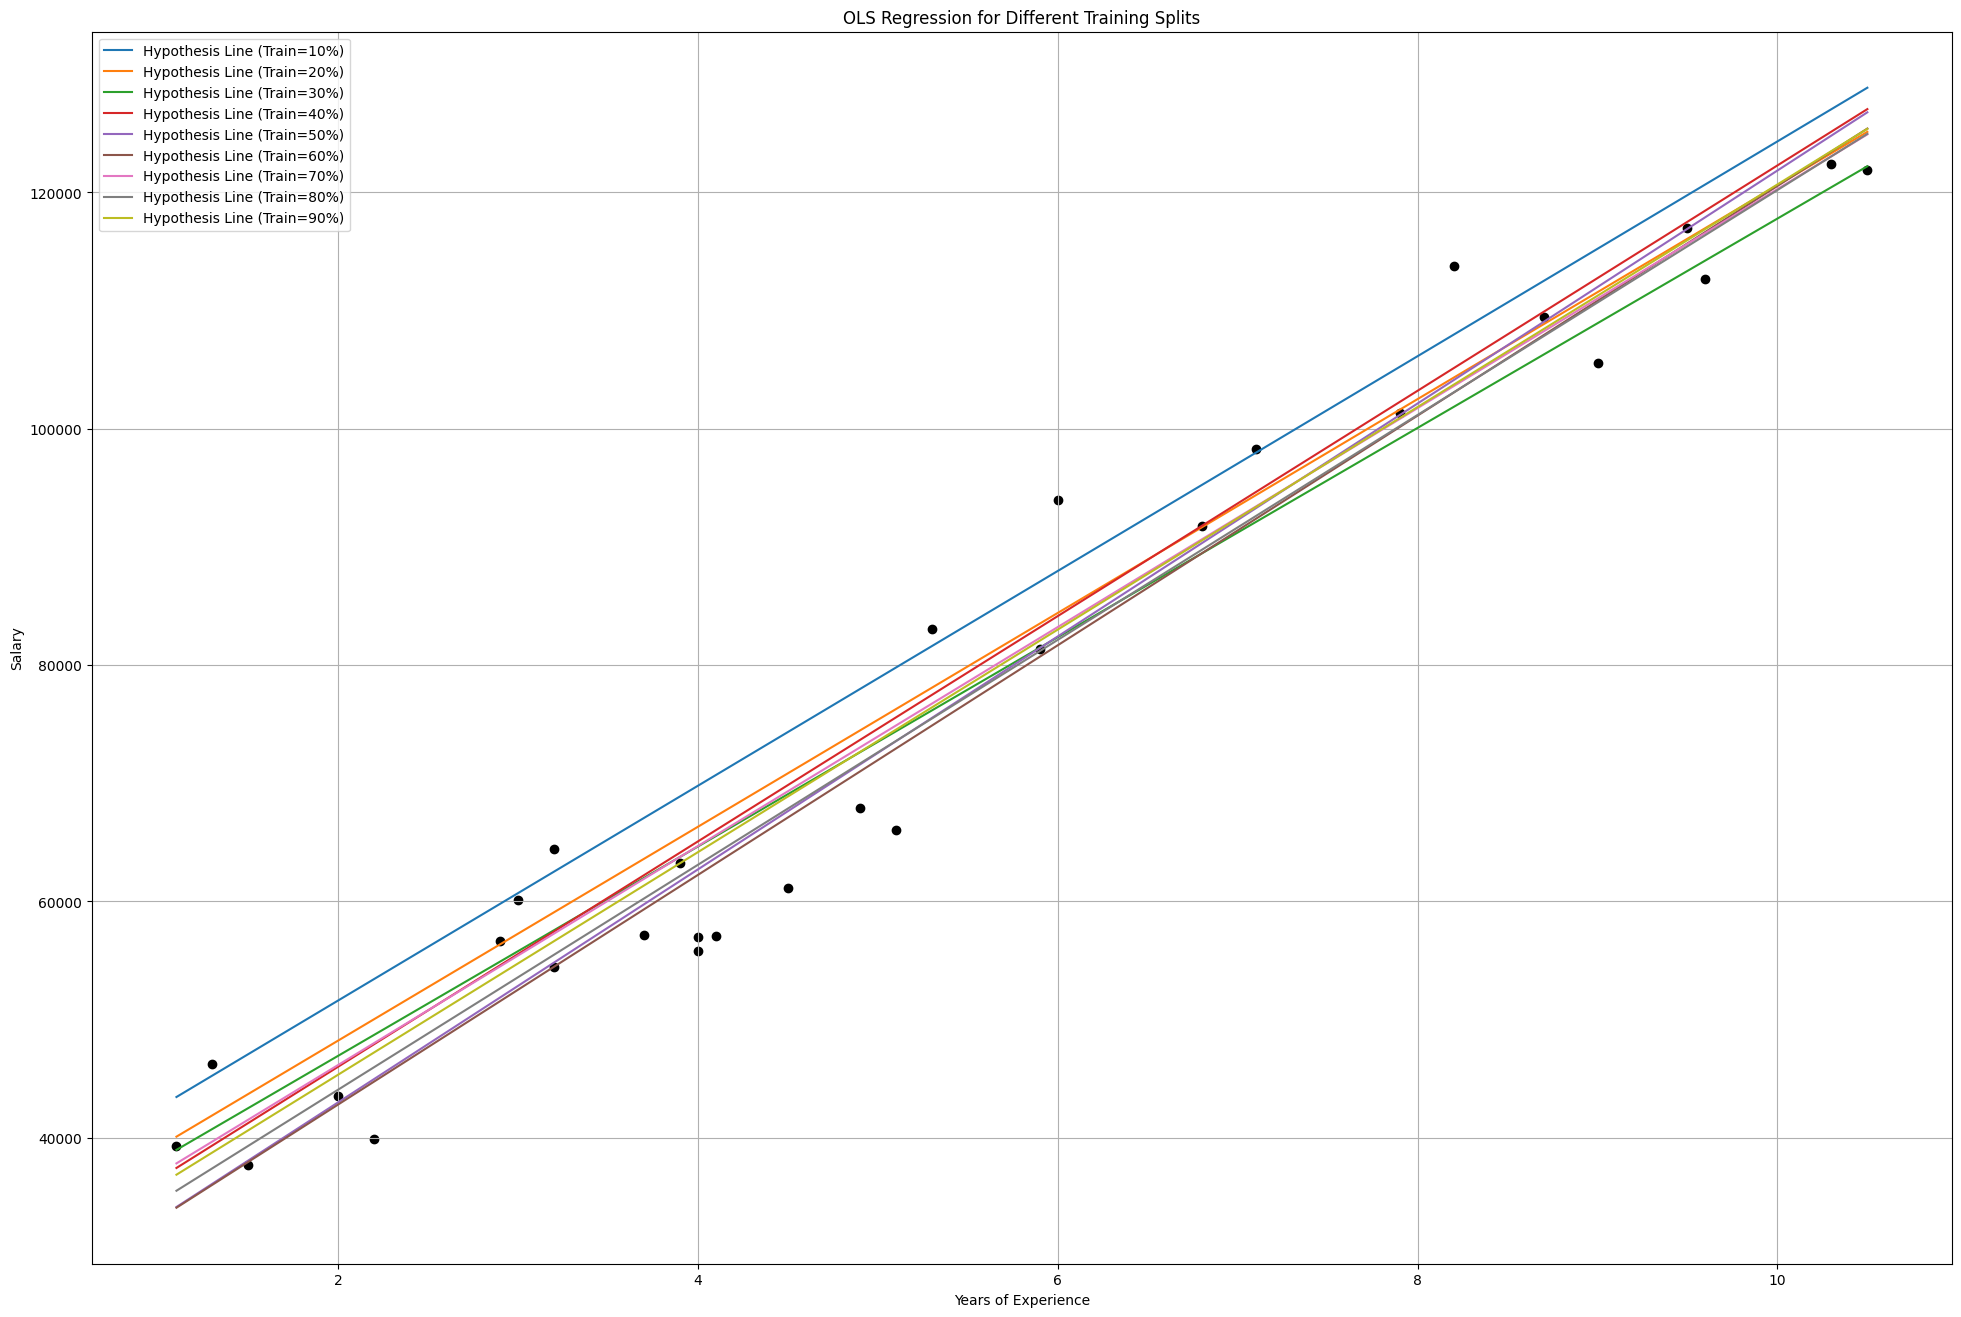

In [8]:
X = df['YearsExperience']
y = df['Salary']

plt.figure(figsize=(24,16))

plt.scatter(X, y, color="black")

for p in range(10, 100, 10): 
    X_train, y_train, X_test, y_test = split_data(X, y, p)
    w0, w1 = ols_fit(X_train, y_train)

    plt.plot(X, predict(X, w0, w1), label=f"Hypothesis Line (Train={p}%)")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("OLS Regression for Different Training Splits")
plt.legend()
plt.grid(True)

plt.savefig("plots/all_hypotheses.png")
plt.show()
plt.close()



In [15]:
import pandas as pd

rows = []
for p in range(10, 100, 10): 
    X_train, y_train, X_test, y_test = split_data(X, y, p)
    w0, w1 = ols_fit(X_train, y_train)

    y_test_pred = predict(X_test, w0, w1)

    for xi, yi, ypi in zip(X_test, y_test, y_test_pred):
        rows.append([p, 100-p, xi, yi, ypi])

df = pd.DataFrame(rows, columns=["Train %", "Test %", "Test Sample (X)", "Actual Salary (y)", "Predicted Salary (ŷ)"])

# Save as Excel
df.to_excel("results/test_predictions.xlsx", index=False)

print("Saved predictions in results/test_predictions.xlsx")

Saved predictions in results/test_predictions.xlsx


In [16]:
def rss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def r2(y, y_pred):
    ss_res = np.sum((y - y_pred) ** 2)             
    ss_tot = np.sum((y - np.mean(y)) ** 2) 
    return 1 - (ss_res / ss_tot)


In [35]:
import pandas as pd

rows = []

for p in range(10, 100, 10): 
    X_train, y_train, X_test, y_test = split_data(X, y, p)
    w0, w1 = ols_fit(X_train, y_train)

    y_train_pred = predict(X_train, w0, w1)
    y_test_pred  = predict(X_test, w0, w1)

    rss_train = rss(y_train, y_train_pred)
    rss_test  = rss(y_test, y_test_pred)
    r2_train  = r2(y_train, y_train_pred)
    r2_test   = r2(y_test, y_test_pred)

    rows.append([p, 100-p, rss_train, r2_train, rss_test, r2_test])

df = pd.DataFrame(rows, columns=["Train %", "Test %", "RSS_train", "R2_train", "RSS_test", "R2_test"])
df.to_excel("results/metrics.xlsx", index=False)

print("RSS and R² for train/test splits saved in results/metrics.csv")


RSS and R² for train/test splits saved in results/metrics.csv


In [38]:
plt.figure(figsize=(8,6))
plt.plot(df["Train %"], df["RSS_train"], marker='o', label="Train RSS")
plt.plot(df["Train %"], df["RSS_test"], marker='s', label="Test RSS")

plt.xlabel("Percentage of Training Samples")
plt.ylabel("Mean of Sum of Squared Residuals (RSS)")
plt.title("Train vs Test RSS over Different Training Splits")
plt.legend()
plt.grid(True)

plt.savefig("plots/rss_vs_train_percent.png")
plt.close()

print("Saved plot: results/plots/rss_vs_train_percent.png")

Saved plot: results/plots/rss_vs_train_percent.png


In [24]:
# Plot Train vs Test R²
plt.figure(figsize=(8,6))
plt.plot(df["Train %"], df["R2_train"], marker='o', label="Train R²")
plt.plot(df["Train %"], df["R2_test"], marker='s', label="Test R²")

plt.xlabel("Percentage of Training Samples")
plt.ylabel("Coefficient of Determination (R²)")
plt.title("Train vs Test R² over Different Training Splits")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("plots/r2_vs_train_percent.png")
plt.close()

print("Saved plot: results/plots/r2_vs_train_percent.png")


Saved plot: results/plots/r2_vs_train_percent.png


In [41]:
rows = []

rows.append(["line 1 Saved predictions in results/analysis.xlsxSaved predictions in results/analysis.xlsxSaved predictions in results/analysis.xlsxSaved predictions in results/analysis.xlsx"])
rows.append(["line 2 Saved predictions in results/analysis.xlsxSaved predictions in results/analysis.xlsxSaved predictions in results/analysis.xlsxSaved predictions in results/analysis.xlsx"])

df = pd.DataFrame(rows, columns=["Analysis"])

df.to_excel("results/analysis.xlsx", index=False)

print("Saved predictions in results/analysis.xlsx")

Saved predictions in results/analysis.xlsx
